# Linear Models

Linear models make a prediction using a linear function of the input features.

__Import libraries__

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

---

## Linear Models for Regression

Works with formula of a line, plane and hyperplane. Alternatively, you can think of the predicted response
as being a weighted sum of the input features, with weights (which can be negative)
given by the entries of w.

Formula for linear models for regression: <br>
ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

w[0]: 0.393906  b: -0.031804


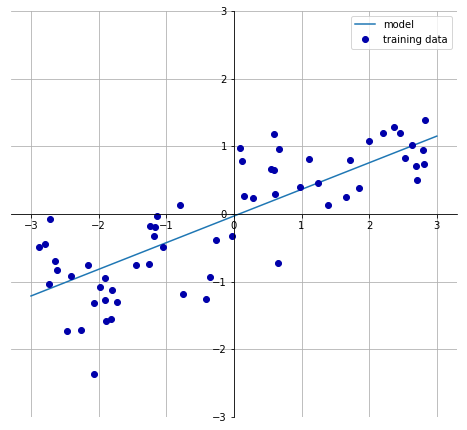

In [3]:
mglearn.plots.plot_linear_regression_wave();

Using a stright line to make predictions seems to very restrictive, it looks we lost all the fine details of our dataset. For dataset with many feature, linear models can be very powerful. 

There are many different linear models for regression. The difference between these
models lies in how the model parameters w and b are learned from the training data,
and how model complexity can be controlled.

### Linear Regression (aka ordinary least squares)

Minimize the least square error between predictions and true regression target y on the training set. Linear Regression has no parameters.

In [6]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
lr = LinearRegression().fit(X_train, y_train)

In [11]:
print("The slope: {}".format(lr.coef_[0]))
print("The intercept: {}".format(lr.intercept_))

The slope: 0.44153666463089647
The intercept: -0.01711124414733381


In [12]:
print("Traing set score: {}".format(lr.score(X_train, y_train)))
print("Test set score: {}".format(lr.score(X_test, y_test)))

Traing set score: 0.6592061059587275
Test set score: 0.6932519118518163


An R2 of around 0.66 is not very good, but we can see that the scores on the training
and test sets are very close together. This means we are likely underfitting, not overfitting.
For this one-dimensional dataset, there is little danger of overfitting, as the
model is very simple (or restricted). However, with higher-dimensional datasets
(meaning datasets with a large number of features), linear models become more powerful,
and there is a higher chance of overfitting.

Apply it to Boston Housing Dataset

In [13]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
lr = LinearRegression().fit(X_train, y_train)

In [15]:
print("Training set score: {}".format(lr.score(X_train, y_train)))
print("Test set score: {}".format(lr.score(X_test, y_test)))

Training set score: 0.9520519609032733
Test set score: 0.6074721959665925


We see that r2 score close to one, which means the model predict the training set very well, but r2 score for test set is the opposite. This is a clear sign of overfitting.

### Ridge Regression

Ridge regression is also a linear model for regression, so the formula it uses to make
predictions is the same one used for ordinary least squares. In ridge regression,
though, the coefficients (w) are chosen not only so that they predict well on the training
data, but also to __fit an additional constraint__. We also want the __magnitude of coefficients
to be as small as possible__; in other words, all entries of w should be close to
zero.

Intuitively, this means each feature should have as __little effect on the outcome__ as
possible (which translates to having a small slope), while still predicting well. This
constraint is an example of what is called regularization. __Regularization means explicitly
restricting a model to avoid overfitting__. The particular kind used by ridge regression
is known as L2 regularization.

In [16]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {}".format(ridge.score(X_train, y_train)))
print("Test set score: {}".format(ridge.score(X_test, y_test)))

Training set score: 0.8857966585170941
Test set score: 0.7527683481744751


As you can see, the training set score of Ridge is lower than for LinearRegression,
while the test set score is higher. This is consistent with our expectation. With linear
regression, we were overfitting our data. Ridge is a more __restricted model__, so we are
less likely to overfit. A less __complex model__ means __worse__ performance on the __training
set__, but better generalization. As we are only interested in generalization performance,
we should choose the Ridge model over the LinearRegression model.

The Ridge model makes a trade-off between the simplicity of the model (near-zero
coefficients) and its performance on the training set.

There is a alpha parameter to control this trade-off. Increasing alpha forces coefficients to move more toward zero, which decreases
training set performance but might help generalization.

In [23]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {}".format(ridge10.score(X_train, y_train)))
print("Test set score: {}".format(ridge10.score(X_test, y_test)))

Training set score: 0.7882787115369614
Test set score: 0.6359411489177309


In [24]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


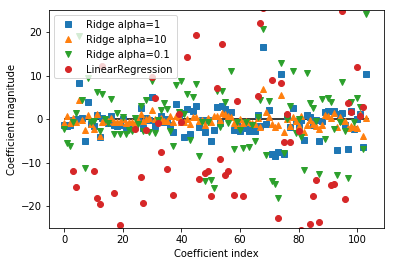

In [40]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(loc='best');

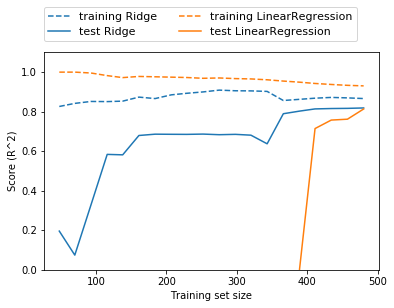

In [27]:
mglearn.plots.plot_ridge_n_samples()

With __enough training data__, __regularization__ becomes __less important__, and given enough data, ridge and linear regression will have the same performance (the fact that this happens here
when using the full dataset is just by chance).

### Lasso

An alternative to Ridge for regularizing linear regression is Lasso. As with ridge
regression, using the lasso also restricts coefficients to be close to zero, but in a
slightly different way, called L1 regularization. The consequence of L1 regularization
is that when using the lasso, some coefficients are exactly zero. This means some features
are entirely ignored by the model. This can be seen as a form of automatic feature
selection.

In [31]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [34]:
lasso.coef_[lasso.coef_ != 0]

array([-5.3529079 , -1.05063037, -3.3104274 , -0.41386744])

Both score for training set and test set is bad, an indication that we are underfitting. We can control it with parameter alpha, the default is 1. Also, we need to increase the default setting of max_iter (the maximum number of iterations to run)

In [35]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

In [36]:
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


If we set alpha to low, we will lose the effect of regularization and end up overfitting


In [37]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


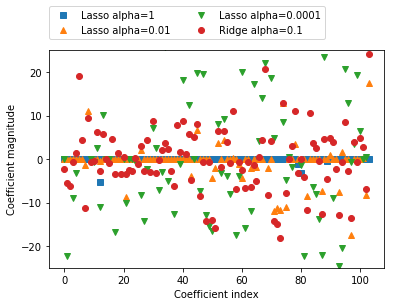

In [39]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude");

In practice, ridge regression is usually the first choice between these two models.
However, if you have a large amount of features and expect only a few of them to be
important, Lasso might be a better choice. Similarly, if you would like to have a
model that is easy to interpret, Lasso will provide a model that is easier to understand,
as it will select only a subset of the input features.

---

## Linear Models for Classification

Let’s look at binary classification first. In this case, a prediction is made using the following formula: <br>
ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

The formula looks very similar to the one for linear regression, but instead of just
returning the weighted sum of the features, we __threshold the predicted value at zero__.
If the function is smaller than zero, we predict the class –1; if it is larger than zero, we
predict the class +1. This prediction rule is common to all linear models for classification.
Again, there are many different ways to find the coefficients (w) and the intercept
(b).

For linear models for classification,
the decision boundary is a linear function of the input. In other words, a (binary) linear
classifier is a classifier that __separates two classes using a line, a plane, or a hyperplane__.

The two most common linear classification algorithms are logistic regression, implemented
in linear_model.LogisticRegression, and linear support vector machines
(linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier).
Despite its name, LogisticRegression is a classification algorithm and not a
regression algorithm, and it should not be confused with LinearRegression.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

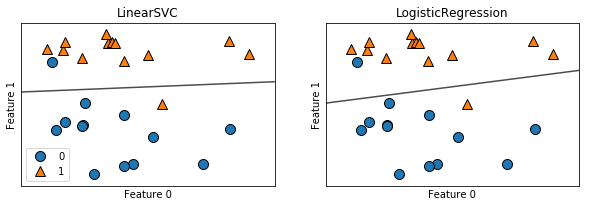

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend();

By default, both models apply an L2 regularization, in the same
way that Ridge does for regression.

For LogisticRegression and LinearSVC the trade-off parameter that __determines the
strength of the regularization is called C, and higher values of C correspond to less regularization__. In other words, when you use a high value for the parameter C, Logis
ticRegression and LinearSVC try to fit the training set as best as possible, while with
__low values of the parameter C, the models put more emphasis on finding a coefficient
vector (w) that is close to zero__.

There is another interesting aspect of how the parameter C acts. __Using low values of C
will cause the algorithms to try to adjust to the “majority” of data points, while using
a higher value of C stresses the importance that each individual data point be classified
correctly__. Here is an illustration using LinearSVC

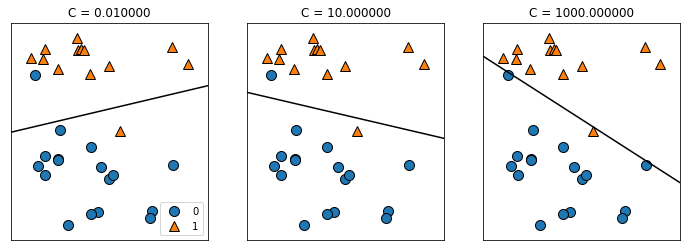

In [49]:
mglearn.plots.plot_linear_svc_regularization()

The strongly regularized model chooses a relatively horizontal line, misclassifying
two points. Higher value of c will lead us to overfitting.

Similarly to the case of regression, linear models for classification might seem very
restrictive in low-dimensional spaces, only allowing for decision boundaries that are
straight lines or planes. Again, in high dimensions, linear models for classification
become very powerful, and guarding against overfitting becomes increasingly important
when considering more features.

Now, let's analyze LogisticRegression in more detail on the Breast Cancer dataset

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], 
                                                   random_state=0)

In [7]:
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {}".format(logreg.score(X_train, y_train)))
print("Test set score: {}".format(logreg.score(X_test, y_test)))

Training set score: 0.960093896713615
Test set score: 0.958041958041958


We see that the performance of our model on training set and test set are good, above 95% accuracy. But since both the traiing set and test set a very close, it is likely that we are underfitting.

In [9]:
# increase the c parameter
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {}".format(logreg100.score(X_train, y_train)))
print("Test set score: {}".format(logreg100.score(X_test, y_test)))

Training set score: 0.9694835680751174
Test set score: 0.958041958041958


In [10]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {}".format(logreg001.score(X_train, y_train)))
print("Test set score: {}".format(logreg001.score(X_test, y_test)))

Training set score: 0.9342723004694836
Test set score: 0.9300699300699301


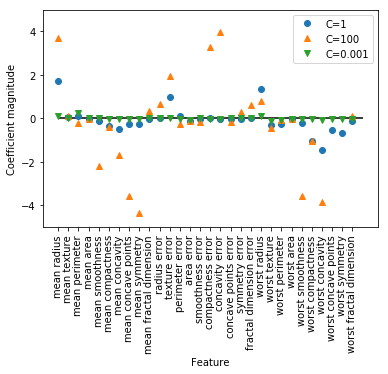

In [12]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend();

As LogisticRegression applies an L2 regularization by default,
the result looks similar to that produced by Ridge.

If we desire a more interpretable model, using L1 regularization might help, as it limits
the model to using only a few features.

Training accuracy of l1 logreg with C=0.001: 0.92
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.94


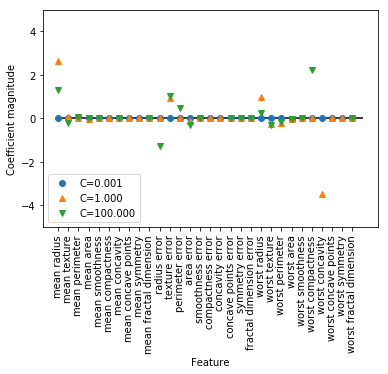

In [14]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
            C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
            C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3);

### Linear Models for Multiclass Classification

Having one binary classifier per class results in having one vector of coefficients (w)
and one intercept (b) for each class. The class for which the result of the classification
confidence formula given here is highest is the assigned class label:
w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

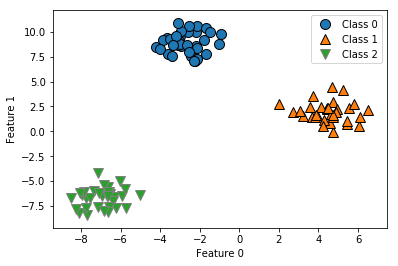

In [20]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(["Class 0", "Class 1", "Class 2"]);

In [21]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


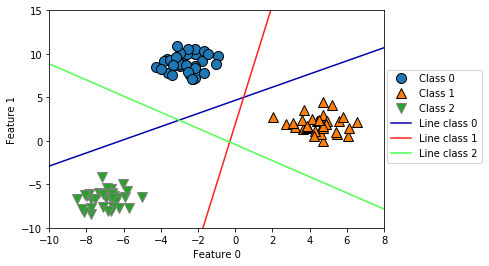

In [22]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                    mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

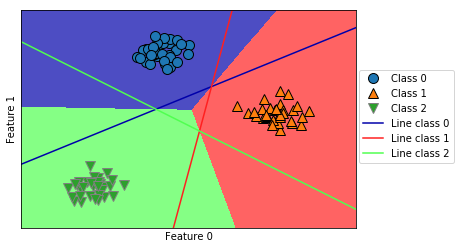

In [24]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                    mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

### Strenghts, Weaknesses, and Parameters

The __main parameter__ of linear models is the __regularization parameter__, called __alpha in
the regression models and C in LinearSVC and LogisticRegression__. __Large values for
alpha or small values for C mean simple models__. In particular for the regression models,
tuning these parameters is quite important. Usually C and alpha are searched for
on a logarithmic scale. The other decision you have to make is whether you want to
use L1 regularization or L2 regularization. If you assume that __only a few of your features
are actually important, you should use L1__. Otherwise, you should default to L2.
L1 can also be useful if interpretability of the model is important. As L1 will use only
a few features, it is easier to explain which features are important to the model, and
what the effects of these features are.


__Linear models are very fast to train, and also fast to predict__. They scale to very large
datasets and work well with sparse data. If your data consists of hundreds of thousands
or millions of samples, you might want to investigate using the __solver='sag'__
option in LogisticRegression and Ridge, which can be faster than the default on
large datasets. Other options are the SGDClassifier class and the SGDRegressor
class, which implement even more scalable versions of the linear models described
here.


Another strength of linear models is that they make it relatively __easy to understand__
how a prediction is made, using the formulas we saw earlier for regression and classification.
Unfortunately, it is often __not entirely clear why coefficients are the way they
are__. This is particularly true if your dataset has highly correlated features; in these
cases, the coefficients might be hard to interpret.

Linear models often perform well when __the number of features is large compared to
the number of samples__. They are also often used on very large datasets, simply
because it’s not feasible to train other models. However, in lower-dimensional spaces,
other models might yield better generalization performance.

___

# Important Points

- Linear Models for Regression:
    - from sklearn.linear_model
    - Attributes: coef_ and intercept_
    - LinearRegression:
        - In low features data, there is a high chance of underfitting
        - Underftting model can be seen if both the training set score and test set score are very close.
        - Score for regression is $R^{2}$
        - Dataset with high features, there is a chance of overfitting the model.
    - Ridge Regression:
        - A way to find sweet spot between underfit and overfit.
        - Fit additional contstraints.
        - The weights in the formula (w) tend to close to zero.
        - Use L2 regularization.
        - Regularization means explicity restricting a model to avoid overfitting. 
        - Each features have little effect to the predicted value.
        - A less complex model means worse performance in the training set.
        - There is parameter to control regularization effect in our model; to control the trade-off between the simplicity of the model and performance on training set.
        - Increasing alpha means our model more regularized which means our chance of overfitting is lower. Model complexity is reduced.
        - With enough training data, regularization becomes less important.
    - Lasso Regression:
        - Use L2 regularization, which means some weights are zero.
        - Some features being ignored.
        - Parameters: alpha and max_iter (the maximum number of interations).
        - Small value of alpha makes Lasso behaves the same way as LinearRegression.
- Linear Models for Classification:
    - Decision boundary is seperated by line (two features), plane (three features), or hyperplane (more than three features).
    - Two common algorithms:
        - LinearSVC (SVC: support vector machine)
            - from sklearn.svm
        - LogisticRegrssion:
            - from sklearn.linear_model
    - Two important paramters:
        - C: 
            - Low value of C means the effect of regularization is stronger.
            - Too low of C value will makes the model underfit
            - Too high of C value will makes the mdoel overfit
            - High value of C makes the model try to adjust to training very well.
            - Low value of C makes the model try to adjust to the majority of the data points.
        - penalty:
            - l1: L1 regularization (makes several features zero)
            - l2: default, just makes the weights close to zero.
- Linear Models for Multi Classification:
    - Seperates the class as its class and the rest.
    - There will be three vector (row) for three classses dataset.
    - ex: if there are three classes and two features. the shape of the coef_ will be (3, 2), means row for each class and column for each features.

---

# Experimentation

## Linear Models for Regression

### LinearRegression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, random_state=21)

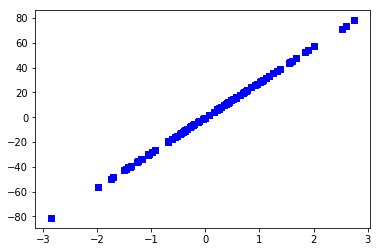

In [34]:
plt.scatter(X, y, marker='s', c='blue');

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

In [36]:
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {}".format(lr.score(X_train, y_train)))
print("Test set score: {}".format(lr.score(X_test, y_test)))

Training set score: 1.0
Test set score: 1.0


Boston Housing Dataset:

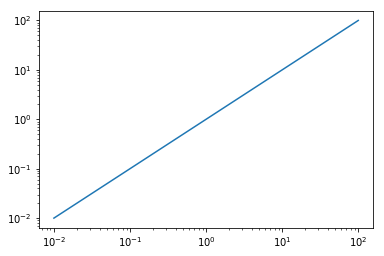

In [39]:
ax = plt.axes()
ax.plot([0.01, 0.1, 1, 10, 100], [0.01, 0.1, 1, 10, 100])
ax.set_xscale('log')
ax.set_yscale('log')